In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report


In [70]:
df_white = pd.read_csv("winequality-white.csv", sep=';')
df_white.describe()

,chlorides,total sulfur dioxide,density,quality,great
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.045772,138.360657,0.994027,5.877909,0.665169
std,0.021848,42.498065,0.002991,0.885639,0.471979
min,0.009000,9.000000,0.987110,3.000000,0.000000
25%,0.036000,108.000000,0.991723,5.000000,0.000000
50%,0.043000,134.000000,0.993740,6.000000,1.000000
75%,0.050000,167.000000,0.996100,6.000000,1.000000
max,0.346000,440.000000,1.038980,9.000000,1.000000


In [71]:
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_red.describe()

,citric acid,chlorides,total sulfur dioxide,density,quality,great
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.270976,0.087467,46.467792,0.996747,5.636023,0.534709
std,0.194801,0.047065,32.895324,0.001887,0.807569,0.498950
min,0.000000,0.012000,6.000000,0.990070,3.000000,0.000000
25%,0.090000,0.070000,22.000000,0.995600,5.000000,0.000000
50%,0.260000,0.079000,38.000000,0.996750,6.000000,1.000000
75%,0.420000,0.090000,62.000000,0.997835,6.000000,1.000000
max,1.000000,0.611000,289.000000,1.003690,8.000000,1.000000


In [75]:
Q1W =  df_white['quality'].quantile(0.25)
Q3W = df_white['quality'].quantile(0.75)
IQRW = Q3W - Q1W

df_IQRW = df_white[(df_red['quality'] > (Q1W-1.5*IQRW)) & (df_white['quality'] < (Q3W+1.5*IQRW))]
df_IQRW.shape

(1520, 13)

In [76]:
Q1R =  df_red['quality'].quantile(0.25)
Q3R = df_red['quality'].quantile(0.75)
IQRR = Q3R - Q1R

df_IQRR = df_red[(df_red['quality'] > (Q1R-1.5*IQRR)) & (df_red['quality'] < (Q3R+1.5*IQRR))]
df_IQRR.shape

(1571, 13)

C:\Users\user\AppData\Local\Temp\ipykernel_11504\1271324777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_white['quality'], hist = False, kde = True,
C:\Users\user\AppData\Local\Temp\ipykernel_11504\1271324777.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_red[

Text(0.5, 1.0, 'Wine Quality')

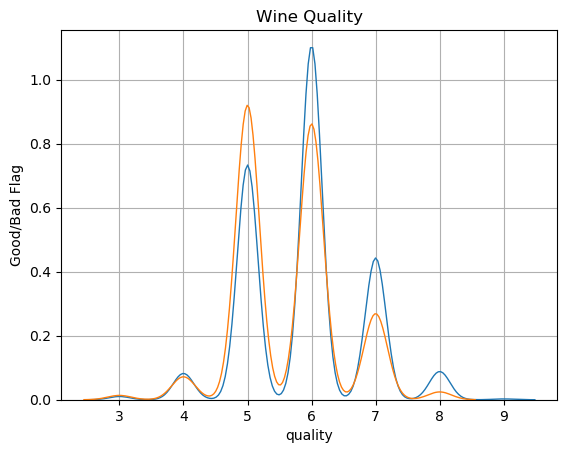

In [95]:

    sns.distplot(df_white['quality'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    
    sns.distplot(df_red['quality'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})

# Plot formatting
plt.grid()
plt.ylabel('Good/Bad Flag')
plt.title('Wine Quality')


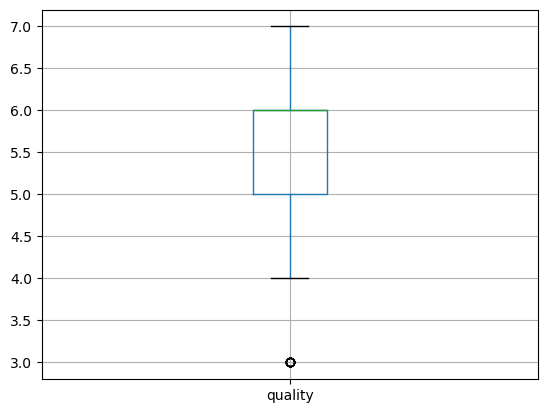

In [79]:
df_IQRW.boxplot(column="quality")

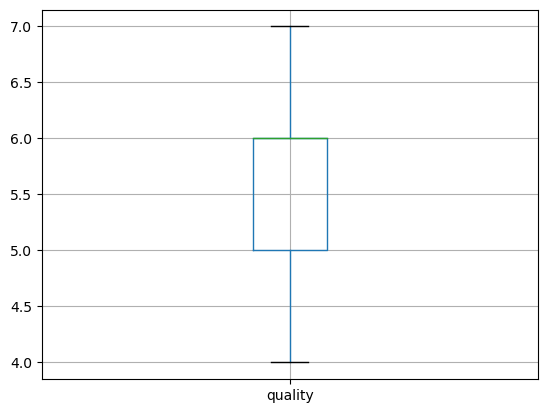

In [80]:
df_IQRR.boxplot(column="quality")

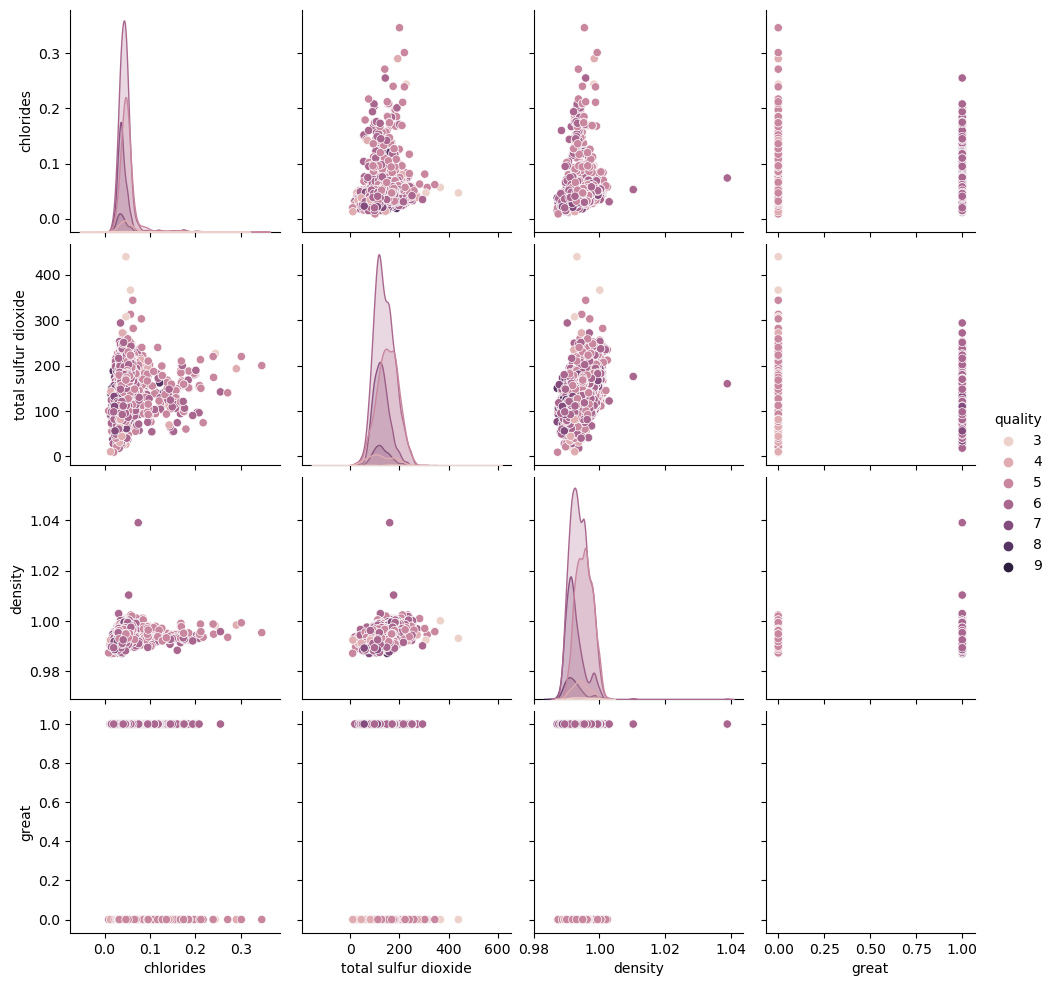

In [90]:
sns.pairplot(df_white, hue="quality")

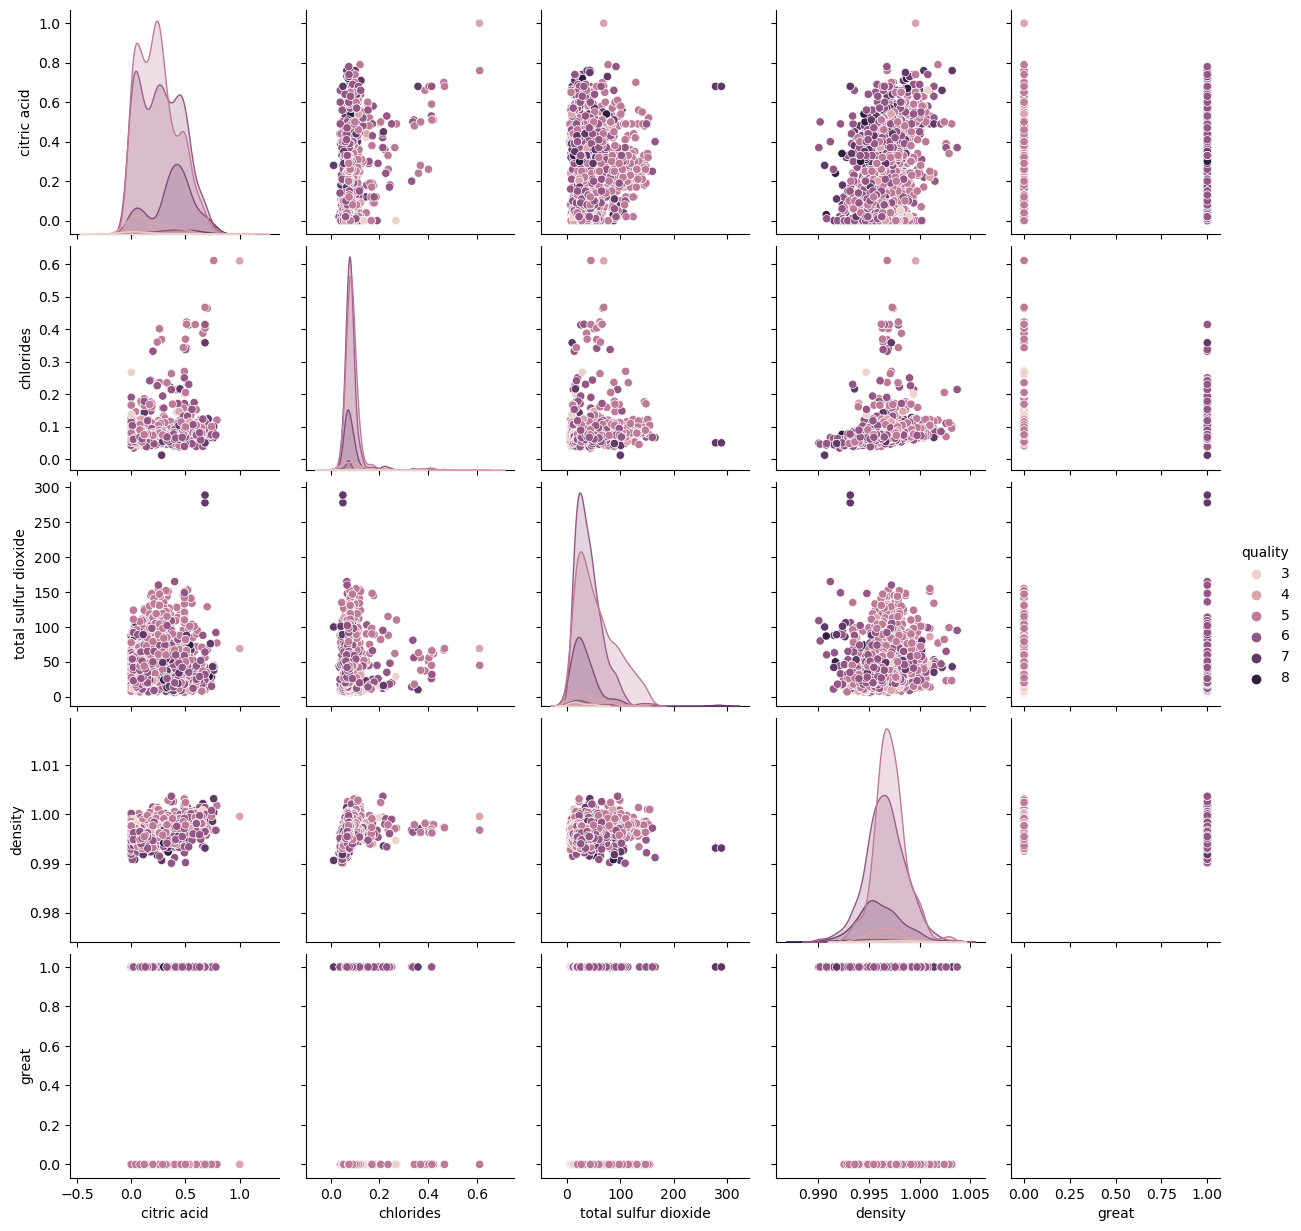

In [91]:
sns.pairplot(df_red, hue="quality")

C:\Users\user\AppData\Local\Temp\ipykernel_11504\1006604199.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_white.corr())


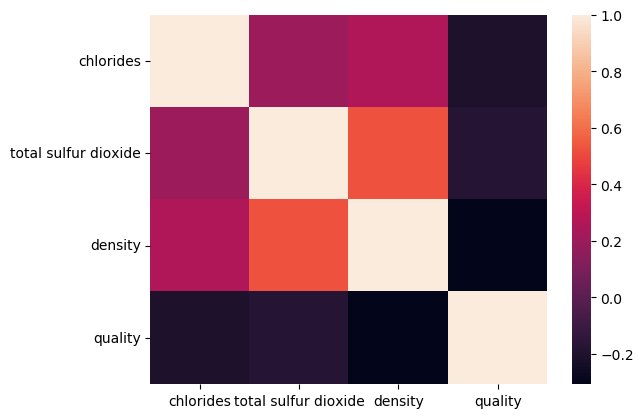

In [106]:
sns.heatmap(df_white.corr())

C:\Users\user\AppData\Local\Temp\ipykernel_11504\1450248984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_red.corr())


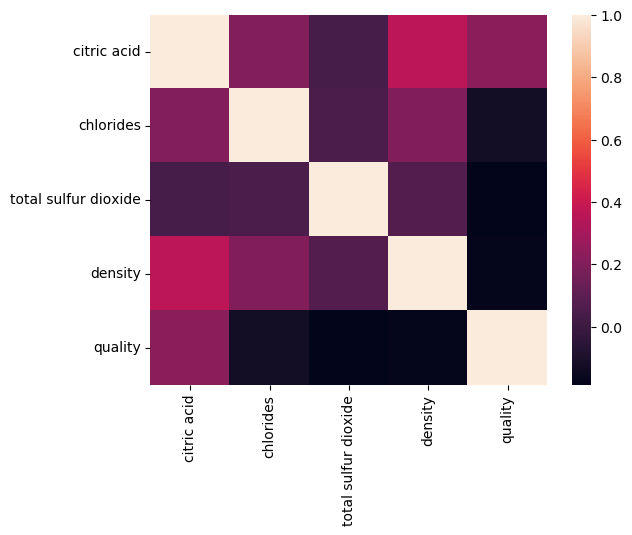

In [107]:
sns.heatmap(df_red.corr())